In [1]:
import math

In [2]:
def flight_plan(c, mk, s_not, q, p, t_maneuver, V, f, Lq, Lp):
    mb = c*math.sqrt(mk)
    mb = math.floor(mb/1000)*1000

    print(f"Scale of the image: {mb:.2f}")

    S = mb*(s_not/100)
    print(f"Length of the image on the world: {S:.2f} m")

    A=S*(1-q)
    print(f"Distance between strips: {A:.2f} m")

    B = S*(1-p)
    print(f"Flight base: {B:.2f} m")

    F = S**2
    print(f"Area that image covers on the ground: {F/1000000:.2f} km^2")

    area_ground = (S-B)*S
    print(f"Area that a model covers on the ground: {area_ground/1000000:.2f} km^2")

    Fn = A*B
    print(f"Additional stereoscopic area: {Fn/1000000:.2f} km^2")

    t = B/(V*1000/3600)
    print(f"Time between two images: {t:.2f} seconds")

    n = (Lq-S)/A + 1
    n = math.ceil(n)
    print(f"Number of strips: {n}")

    N = Lp/B + 4
    N = math.ceil(N)
    print(f"Number of images of each strip: {N}")

    T=N*n
    print(f"Total number of images in the block: {T}")

    t_total = (N-1)*n*t + (n-1)*t_maneuver
    print(f"Total flight time: {t_total:.2f} seconds")
    hours = math.floor(t_total/3600)
    minutes = math.floor((t_total%3600)/60)
    seconds = t_total%60  
    print(f"Total flight time: {hours} hours, {minutes} minutes, {seconds%60:.2f} seconds")

    hg = (f/1000)*mb
    print(f"Average flight height: {hg:.2f} m")

* c = 100: High-precision works like coordinate and profile jobs
* c = 125: Road projects
* c = 150: Planning of engineering structures
* c = 175: Graphic cadastre projects
* c = 200: General mapping projects
* c = 225: Planning projects

In [3]:
import matplotlib.pyplot as plt
def profile_plot(num_images, B, h1, h2, hg):
    d_values = [i * B for i in range(num_images)]
    h_values = [h1 if i % 2 != 0 else h2 for i in range(num_images)]

    plt.figure(figsize=(10, 6))
    plt.plot(d_values, h_values, 'o-')
    
    plt.axhline(y = hg, color = 'r', linestyle = '-', label='hg') 
    plt.xlabel('Distance (m)')
    plt.ylabel('Height (m)')
    plt.title('Profile for a Strip')
    plt.ylim(bottom=0, top=2000)
    plt.grid(True)
    plt.legend()
    plt.show()

In [4]:
c=150 # constant
mk=5000 # scale of the map
s_not=21 # size of image, in cm
q=0.4 # sidelap
p=0.6 # overlap
t_maneuver=6*60 # time of maneuver, in seconds
V=200 # speed of the plane, in km/h
f=164.67 # focal length, in mm
Lq= 4000 # length of the block, in m
Lp= 6000 # width of the block, in m

flight_plan(c, mk, s_not, q, p, t_maneuver, V, f, Lq, Lp)

Scale of the image: 10000.00
Length of the image on the world: 2100.00 m
Distance between strips: 1260.00 m
Flight base: 840.00 m
Area that image covers on the ground: 4.41 km^2
Area that a model covers on the ground: 2.65 km^2
Additional stereoscopic area: 1.06 km^2
Time between two images: 15.12 seconds
Number of strips: 3
Number of images of each strip: 12
Total number of images in the block: 36
Total flight time: 1218.96 seconds
Total flight time: 0 hours, 20 minutes, 18.96 seconds
Average flight height: 1646.70 m


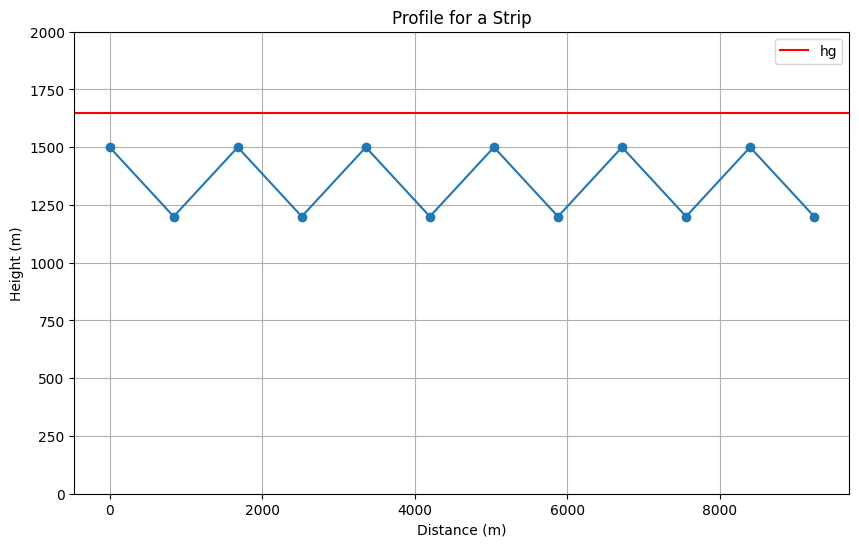

In [5]:
num_images = 12
B = 840
h1 = 1200
h2 = 1500
hg = 1646.70
profile_plot(num_images, B, h1, h2, hg)